In [1]:
# Import some useful stuff
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Allow inline plots
%matplotlib inline

# Import breast cancer data set
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer(as_frame=True)


In [2]:
###################
# Data Exploration
###################

# Have a look at our data
cancer_data.data


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


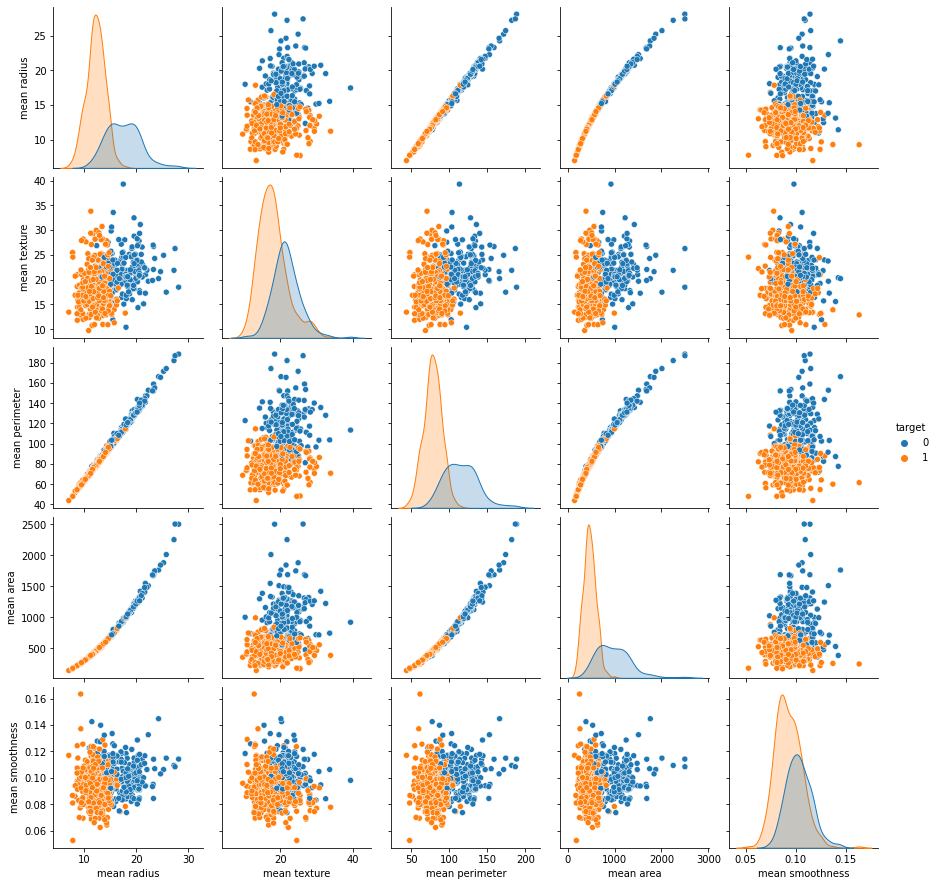

In [3]:
# Plot some variables to have a look
# Tack on the target to the end so we can color code it
cancer_data_pair = cancer_data.data[cancer_data.data.columns[0:10]].copy()
cancer_data_pair['target'] = cancer_data.target.copy()
sns.pairplot(cancer_data_pair, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

<AxesSubplot:>

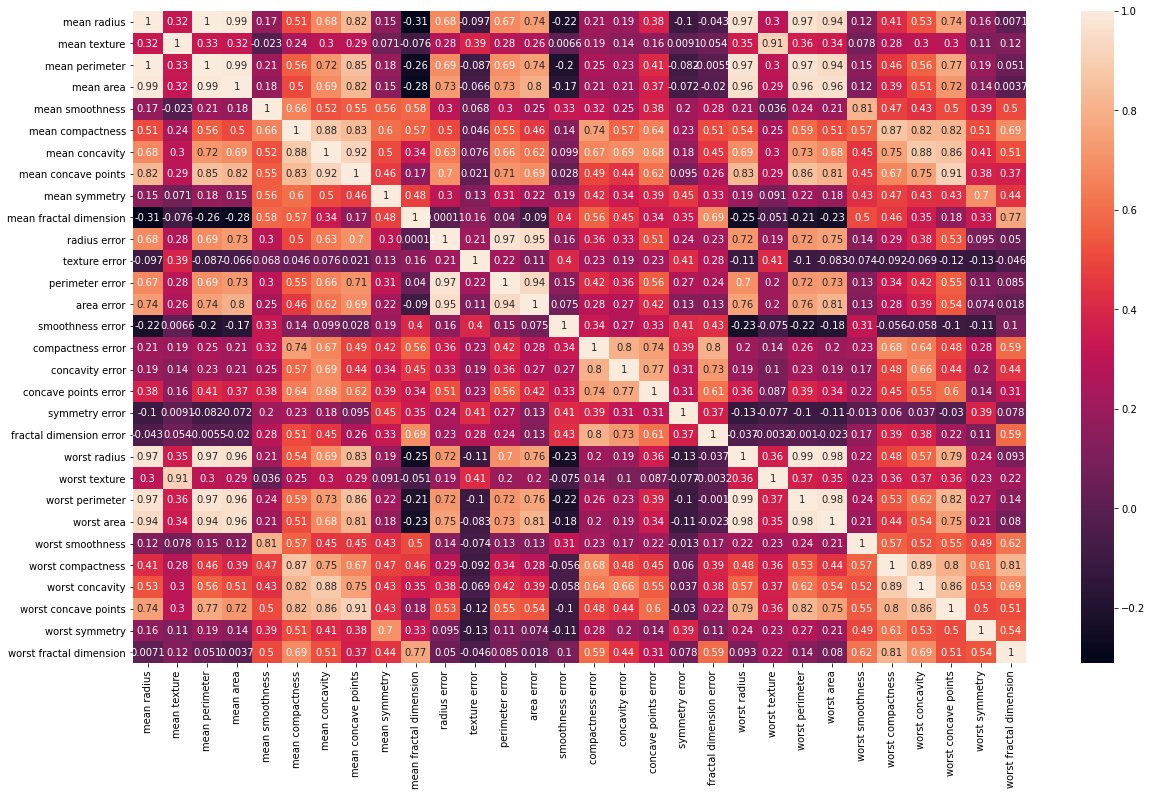

In [4]:
# Cool, now lets check out correlation between features.
plt.figure(figsize=(20, 12))
sns.heatmap(cancer_data.data.corr(), annot=True)

<AxesSubplot:>

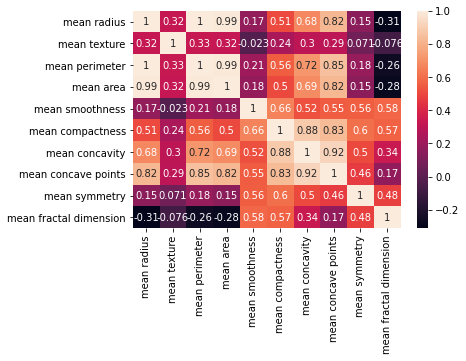

In [5]:
# Plot correlation between the first 10 features only
sns.heatmap(cancer_data.data[cancer_data.data.columns[0:10]].corr(), annot=True)

In [6]:
# Aight let's get to training our model. We are going to use a Support Vector Machine (SVM) to classify tumors as either benign or malignant.
# Set data to 'X' and class lables to 'y' for convenience

X = cancer_data.data
y = cancer_data.target

results = []

# Let test size vary from 10% to 90% of dataset
test_size_range = [x * 0.1 for x in range(1, 10)]

for size in test_size_range:
    train_size = 1 - size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=20)

    # Now for SVM training
    svc_model = SVC(kernel='linear')
    svc_model.fit(X_train, y_train)

    # Predict using model
    y_pred = svc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append( (round(train_size,1), round(size,1), round(accuracy,4)) )

print("SVM Results: ", results)


SVM Results:  [(0.9, 0.1, 0.9649), (0.8, 0.2, 0.9561), (0.7, 0.3, 0.9532), (0.6, 0.4, 0.9518), (0.5, 0.5, 0.9474), (0.4, 0.6, 0.9532), (0.3, 0.7, 0.9348), (0.2, 0.8, 0.9364), (0.1, 0.9, 0.9318)]


# SVM Results
| Train Size | Test Size | Accuracy |
| --- | --- | --- |
| 0.9 | 0.1 | 0.9649 |
| 0.8 | 0.2 | 0.9561 |
| 0.7 | 0.3 | 0.9532 |
| 0.6 | 0.4 | 0.9518 |
| 0.5 | 0.5 | 0.9474 |
| 0.4 | 0.6 | 0.9532 |
| 0.3 | 0.7 | 0.9348 |
| 0.2 | 0.8 | 0.9364 |
| 0.1 | 0.9 | 0.9318 |

As we can see, it appears the model accuracy is better with the more training samples used to train the model. However, Using to many samples to train while reserving few for testing and validating may not give us the full picture of how well our model is performing. So we will stick to conventions and use a spit of 80/20 for trainging and testing respectivley.

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        80
           1       0.98      0.95      0.96       148

    accuracy                           0.95       228
   macro avg       0.94      0.95      0.95       228
weighted avg       0.95      0.95      0.95       228



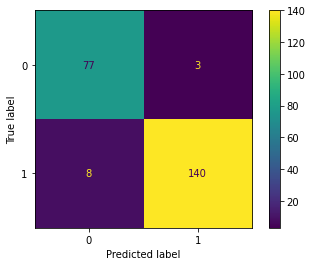

In [7]:
# Have a look at the confusion matirix for a 60/40 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=20)

# Now for SVM training
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Predict using model
y_pred = svc_model.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(svc_model, X_test, y_test)

# Show classification report
print(classification_report(y_test, y_pred))

In [8]:
# Attempt to manually drop columns. (Feature elimination)
X = cancer_data.data.drop(columns=cancer_data.feature_names[10:],axis=1)
y = cancer_data.target

results = []

# Let test size vary from 10% to 90% of dataset
test_size_range = [x * 0.1 for x in range(1, 10)]

svc_model = SVC(kernel='linear')

for size in test_size_range:
    train_size = 1 - size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=20)

    # Now for SVM training
    svc_model.fit(X_train, y_train)

    # Predict using model
    y_pred = svc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append( (round(train_size,1), round(size,1), round(accuracy,4)) )

print("SVM Results: ", results)


SVM Results:  [(0.9, 0.1, 0.9123), (0.8, 0.2, 0.9211), (0.7, 0.3, 0.9064), (0.6, 0.4, 0.9167), (0.5, 0.5, 0.9158), (0.4, 0.6, 0.9094), (0.3, 0.7, 0.9023), (0.2, 0.8, 0.9035), (0.1, 0.9, 0.8908)]


# SVM Results (Eliminate features 11-30)
| Train Size | Test Size | Accuracy |
| --- | --- | --- |
| 0.9 | 0.1 | 0.9123 |
| 0.8 | 0.2 | 0.9211 |
| 0.7 | 0.3 | 0.9064 |
| 0.6 | 0.4 | 0.9167 |
| 0.5 | 0.5 | 0.9158 |
| 0.4 | 0.6 | 0.9094 |
| 0.3 | 0.7 | 0.9023 |
| 0.2 | 0.8 | 0.9035 |
| 0.1 | 0.9 | 0.8908 |

Interestingly, the average accuracy went down after eliminating the features! It appears our selection of features deemed unimportant were incorrect!

In [9]:
# Now let's try normailizing our data to see if we get better results

# Create a min/max processor object
min_max_scalar = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scalar.fit_transform(cancer_data.data)

cancer_data_normalized = pd.DataFrame(x_scaled, columns=cancer_data.feature_names)

# Repeat the above with the normalized data
X_normalized = cancer_data_normalized
y = cancer_data.target

results = []

# Let test size vary from 10% to 90% of dataset
test_size_range = [x * 0.1 for x in range(1, 10)]
svc_model = SVC(kernel='linear')
for size in test_size_range:
    train_size = 1 - size
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = size, random_state=20)

    # Now for SVM training
    
    svc_model.fit(X_train, y_train)

    # Predict using model
    y_pred = svc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append( (round(train_size,1), round(size,1), round(accuracy,4)) )

print("SVM Results (Normalized): ", results)


SVM Results (Normalized):  [(0.9, 0.1, 0.9825), (0.8, 0.2, 0.9912), (0.7, 0.3, 0.9942), (0.6, 0.4, 0.9825), (0.5, 0.5, 0.9719), (0.4, 0.6, 0.9678), (0.3, 0.7, 0.9724), (0.2, 0.8, 0.9693), (0.1, 0.9, 0.9474)]


# SVM Results (Normalized)
| Train Size | Test Size | Accuracy |
| --- | --- | --- |
| 0.9 | 0.1 | 0.9825 |
| 0.8 | 0.2 | 0.9912 |
| 0.7 | 0.3 | 0.9942 |
| 0.6 | 0.4 | 0.9825 |
| 0.5 | 0.5 | 0.9719 |
| 0.4 | 0.6 | 0.9678 |
| 0.3 | 0.7 | 0.9724 |
| 0.2 | 0.8 | 0.9693 |
| 0.1 | 0.9 | 0.9474 |

As we can see, by normalizing our data we achieve much better classification results!

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



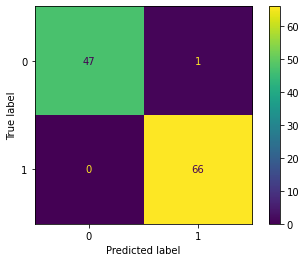

In [10]:
# Have a look at the confusion matirix for a 80/20 (Normalized)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state=20)

# Now for SVM training
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')

svc_model.fit(X_train, y_train)

# Predict using model
y_pred = svc_model.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(svc_model, X_test, y_test)

# Show classification report
print(classification_report(y_test, y_pred))

In [11]:
# Okay, finally let's check if we can reduce the feature set with PCA.

# Let num components vary from 1 to 20
n_comp_range = range(1, 21)
results_pca = []

for n_components in n_comp_range:
    cancer_pca = PCA(n_components=n_components)
    cancer_pca.fit(X_normalized)

    # Apply the transfrorm to the data
    X_normalized_pca = cancer_pca.transform(X_normalized)

    # Use 80/20 split as discovered above
    X_train, X_test, y_train, y_test = train_test_split(X_normalized_pca, y, test_size = 0.2, random_state=20)

    # Now for SVM training
    svc_model = SVC(kernel='linear')
    svc_model.fit(X_train, y_train)

    # Predict using model
    y_pred = svc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_pca.append( (n_components, round(accuracy,4)) )

print("SVM Results (Normalized/PCA): ", results_pca)

SVM Results (Normalized/PCA):  [(1, 0.9386), (2, 0.9561), (3, 0.9737), (4, 0.9737), (5, 0.9825), (6, 0.9825), (7, 0.9912), (8, 0.9825), (9, 0.9912), (10, 0.9912), (11, 0.9912), (12, 0.9912), (13, 0.9912), (14, 0.9912), (15, 0.9912), (16, 0.9912), (17, 0.9912), (18, 0.9912), (19, 0.9912), (20, 0.9912)]


# SVM Results (Normalized/PCA)

| Num Components | Accuracy |
|--- |--- |
| 1  | 0.9386 |
| 2  | 0.9561 |
| 3  | 0.9737 |
| 4  | 0.9737 |
| 5  | 0.9825 |
| 6  | 0.9825 |
| 7  | 0.9912 |
| 8  | 0.9825 |
| 9  | 0.9912 |
| 10 | 0.9912 |
| 11 | 0.9912 |
| 12 | 0.9912 |
| 13 | 0.9912 |
| 14 | 0.9912 |
| 15 | 0.9912 |
| 16 | 0.9912 |
| 17 | 0.9912 |
| 18 | 0.9912 |
| 19 | 0.9912 |
| 20 | 0.9912 |

As we can see above, we achieve sufficient accuracy using anything above 8 components.
Sweet! So any new samples that we recieve, we will first normalize, then decompose with PCA to 10 components before running through our model.


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



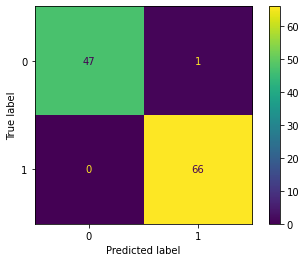

In [12]:
# Let's go ahead and train the final model. We'll use 10 components
cancer_pca = PCA(n_components=10)
cancer_pca.fit(X_normalized)

# Apply the transfrorm to the data
X_normalized_pca = cancer_pca.transform(X_normalized)

# Use 80/20 split as discovered above
X_train, X_test, y_train, y_test = train_test_split(X_normalized_pca, y, test_size = 0.2, random_state=20)

# Now for SVM training
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Predict using model
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Show classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plot_confusion_matrix(svc_model, X_test, y_test)


Sweet! As before we see 99% accuracy but with only 10 features instead of the full 30!